In [214]:
from ModularCirc.Models.NaghaviModel import NaghaviModel, NaghaviModelParameters

# import solver
from ModularCirc.Solver import Solver

In [215]:
from ModularCirc.Models.OdeModel import OdeModel 

In [216]:
po = NaghaviModelParameters()

In [217]:
po.set_chamber_comp('lv', E_pas=10) #I play around with parameters here :D
po['lv']['E_pas']


10

In [218]:
po.components.keys()

dict_keys(['ao', 'art', 'ven', 'av', 'mv', 'la', 'lv'])

In [219]:
po.components['ao'].keys()
po.components['lv'].keys()

Index(['E_pas', 'E_act', 'v_ref', 'k_pas', 'activation_function', 't_tr',
       't_max', 'tau', 'delay', 'v', 'p', 'activation_func'],
      dtype='object')

In [220]:
TIME_SETUP_DICT = {
        'name'       :  'TimeTest', # the name asssociated with the temporal discretization (not super important.. names internat variable)
        'ncycles'    :  60,         # the maximum number of cycles for which we run the simulation
        'tcycle'     :  1000.,      # the duration of a heart beat (here in ms)
        'dt'         :  1.0,        # the duration of a discrete time step
        'export_min' :  2           # number of time steps for which we export the simulation (can also be used as a way to impose a minimum number of pulses)
    }


In [221]:
model = NaghaviModel(
    time_setup_dict=TIME_SETUP_DICT,
    parobj=po,                
    suppress_printing=True
)

In [222]:
from ModularCirc.Solver import Solver

In [223]:
solver = Solver(model=model)
solver.setup(
    optimize_secondary_sv=False,
    suppress_output=True,
    step_tol=0.001,
    conv_cols=['p_lv', 'v_lv'],
    method='LSODA'                       # 'LSODA' 'BDF
)

In [224]:
solver._asd

,v_ao,v_art,v_ven,v_la,v_lv,p_lv,q_av,p_ao,p_art,q_ao,p_ven,q_art,p_la,q_ven,q_mv
0,130.0,1092.0,3780.4,93.6,104.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [225]:
solver.solve()
#= %prun -l 40 -s tottime solver.solve()
# %prun -l 40 -s cumtime solver.solve()
# %prun -s cumtime solver.solve()
solver.converged

True

In [226]:
solver.Nconv

17

In [227]:
model.components['lv'].V

0        104.000000
1        102.305616
2        101.681119
3        101.403771
4        101.238352
            ...    
17996     40.030125
17997     40.044408
17998     40.055494
17999     40.063409
18000     40.068181
Name: v_lv, Length: 18001, dtype: float64

In [228]:
from ModularCirc.Analysis.BaseAnalysis import BaseAnalysis
import matplotlib.pyplot as plt

In [229]:
ba= BaseAnalysis(model)

In [230]:
po.set_chamber_comp('lv', E_pas=10)
print(po['lv']['E_pas'])
po.set_chamber_comp('la', E_pas=10)

10


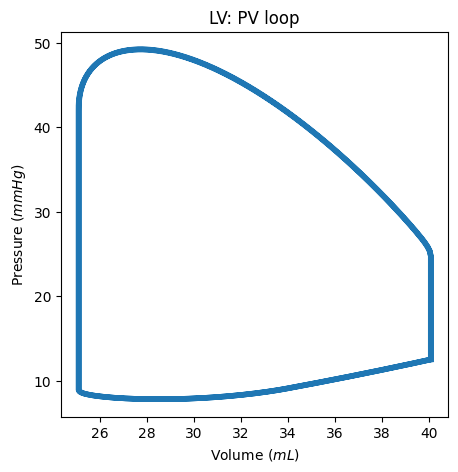

In [231]:
ba.plot_p_v_loop('lv')
plt.show()

[]

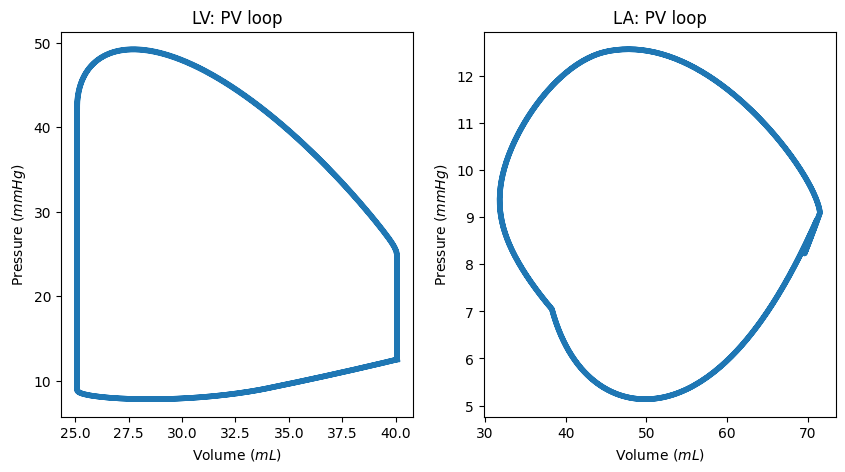

In [232]:
fig, ax= plt.subplots(ncols=2, figsize=(10, 5))
ba.plot_p_v_loop('lv', ax=ax[0])
ba.plot_p_v_loop('la', ax=ax[1])
plt.plot()

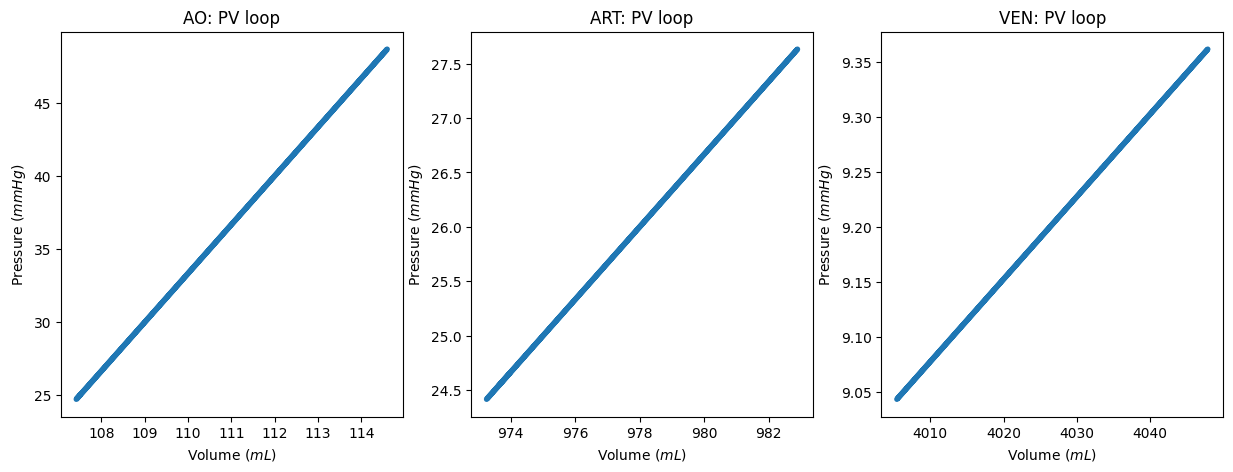

In [233]:
fig, ax= plt.subplots(ncols=3, figsize=(15, 5))
ba.plot_p_v_loop('ao', ax=ax[0])
ba.plot_p_v_loop('art', ax=ax[1])
ba.plot_p_v_loop('ven', ax=ax[2])

plt.show()

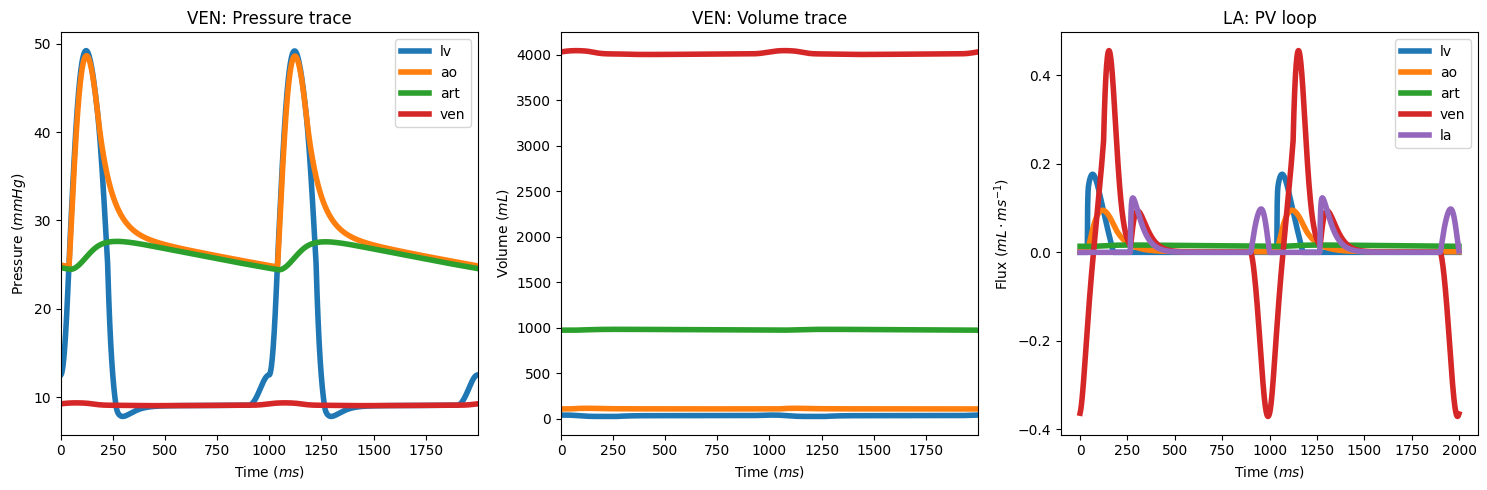

In [234]:
fig, ax= plt.subplots(ncols=3, figsize=(15, 5))
ba.plot_t_p('lv', ax=ax[0], time_units='ms')
ba.plot_t_p('ao', ax=ax[0], time_units='ms')
ba.plot_t_p('art', ax=ax[0], time_units='ms')
ba.plot_t_p('ven', ax=ax[0], time_units='ms')

ba.plot_t_v('lv', ax=ax[1], time_units='ms')
ba.plot_t_v('ao', ax=ax[1], time_units='ms')
ba.plot_t_v('art', ax=ax[1], time_units='ms')
ba.plot_t_v('ven', ax=ax[1], time_units='ms')

ba.plot_t_q_out('lv', ax=ax[2], time_units='ms')
ba.plot_t_q_out('ao', ax=ax[2], time_units='ms')
ba.plot_t_q_out('art', ax=ax[2], time_units='ms')
ba.plot_t_q_out('ven', ax=ax[2], time_units='ms')
ba.plot_t_q_out('la', ax=ax[2], time_units='ms')

ax[0].legend()
ax[2].legend()

fig.tight_layout()
plt.show()

In [235]:
print(ba.compute_cardiac_output('lv'))

0.8987040763556028


In [236]:
ba.compute_artery_pressure_range('ao')

(np.float64(24.736255186124314), np.float64(48.64027098114743))